In [1]:
import torch
import matplotlib.pyplot as plt
import ESN
import time
import numpy as np
import json
torch.set_default_device("cuda:0")
torch.set_default_dtype(torch.double)

In [3]:
sigmas = torch.linspace(0.1,2.0,39)

ipcs=torch.tensor(())
for sigma in sigmas:
    ipc=[]
    fn = r"10N_2din_%.2f_s"%(sigma)
    
    ipc = torch.load(f"./experiments/ipcs/{fn}_ipc.pt")
    capacities = ipc.val
    totCapacity = float(torch.sum(capacities))
    print("totoal capacity:",totCapacity)
    
    c_1st = ipc.ipc_by_degree(1)
    c_2nd = ipc.ipc_by_degree(2)
    c_3rd = ipc.ipc_by_degree(3)
    c_4th = ipc.ipc_by_degree(4)
    c_5th = ipc.ipc_by_degree(5)
    c_6th = ipc.ipc_by_degree(6)
    c_7th = ipc.ipc_by_degree(7)
    
    """
    print("2nd order ipc:",float(c_2nd))
    print("3rd order ipc:",float(c_3rd))
    print("4th order ipc:",float(c_4th))
    print("5th order ipc:",float(c_5th))
    """
    ipc_by_deg = torch.tensor([c_1st,c_2nd,c_3rd,c_4th,c_5th,c_6th,c_7th])
    ipcs = torch.cat((ipcs,ipc_by_deg.unsqueeze(0)),0)



/tmp/ipykernel_193656/557333590.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ipc = torch.load(f"./experiments/ipcs/{fn}_ipc.pt")


totoal capacity: 19.43451731917356
totoal capacity: 19.36136816391911
totoal capacity: 19.33674328250214
totoal capacity: 19.342280828107164
totoal capacity: 19.354119894698417
totoal capacity: 19.36394181806894
totoal capacity: 19.37130322808977
totoal capacity: 19.374607230964116
totoal capacity: 19.36794127926524
totoal capacity: 19.356567857163284
totoal capacity: 19.331032768332413
totoal capacity: 19.304780321582694
totoal capacity: 19.277849132596785
totoal capacity: 19.26484691996449
totoal capacity: 19.240665848116006
totoal capacity: 19.231181238170993
totoal capacity: 19.224433194607617
totoal capacity: 19.21411566498659
totoal capacity: 19.20840404601369
totoal capacity: 19.20154810609033
totoal capacity: 19.190694689787982
totoal capacity: 19.18428417790763
totoal capacity: 19.17694667016905
totoal capacity: 19.173506710847274
totoal capacity: 19.165909744642907
totoal capacity: 19.157892294470507
totoal capacity: 19.136287234831567
totoal capacity: 19.116791411888183
toto

tensor([0.1000, 0.1500, 0.2000, 0.2500, 0.3000, 0.3500, 0.4000, 0.4500, 0.5000,
        0.5500, 0.6000, 0.6500, 0.7000, 0.7500, 0.8000, 0.8500, 0.9000, 0.9500,
        1.0000, 1.0500, 1.1000, 1.1500, 1.2000, 1.2500, 1.3000, 1.3500, 1.4000,
        1.4500, 1.5000, 1.5500, 1.6000, 1.6500, 1.7000, 1.7500, 1.8000, 1.8500,
        1.9000, 1.9500, 2.0000], device='cuda:0')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


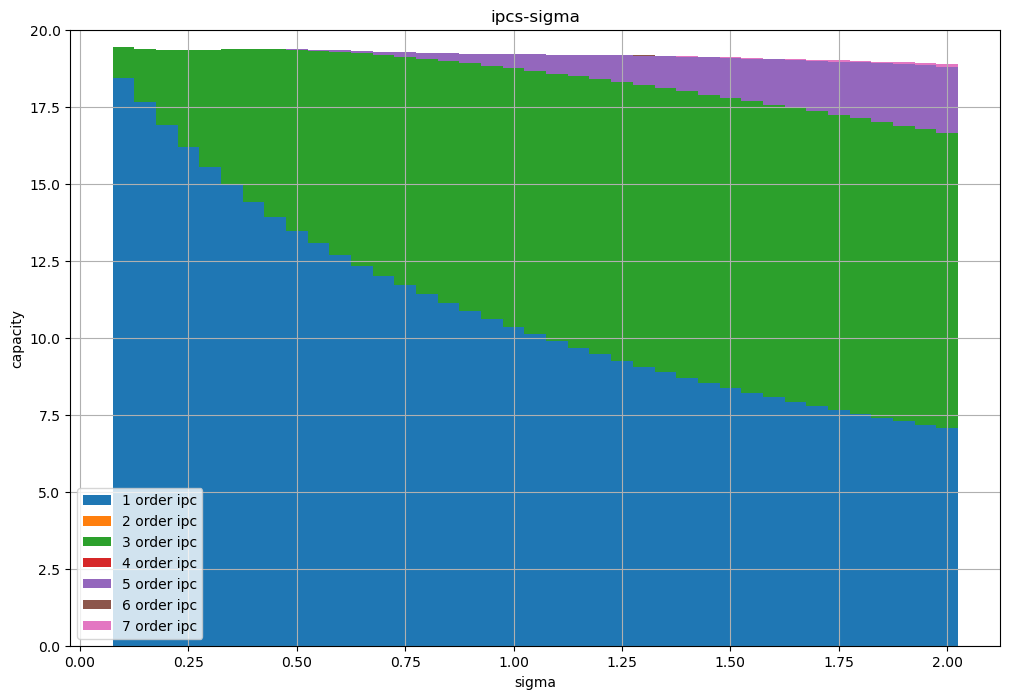

In [4]:
plt.figure(figsize=(12,8))
bottom=np.zeros(39)
print(sigmas)

for i in range(7):
    plt.bar(sigmas.cpu().numpy(),ipcs[:,i].cpu().numpy(),bottom=bottom,width=0.05,label=f"{i+1} order ipc")
    bottom+=ipcs[:,i].cpu().numpy()
    
plt.grid(True)
plt.ylim(0,20)
plt.title("ipcs-sigma")
plt.xlabel("sigma")
plt.ylabel("capacity")
plt.legend()

plt.savefig("./graphs/ipcs_sigma.eps")
plt.savefig("./graphs/ipcs_sigma.png")

In [5]:
rhos = torch.linspace(0.1,1.2,23)

ipcs=torch.tensor(())
for rho in rhos:
    ipc=[]
    fn = r"20N_3din_%.2f_rho"%(rho)
    
    ipc = torch.load(f"./experiments/ipcs/{fn}_ipc.pt")
    capacities = ipc.val
    totCapacity = float(torch.sum(capacities))
    print("totoal capacity:",totCapacity)
    
    c_1st = ipc.ipc_by_degree(1)
    c_2nd = ipc.ipc_by_degree(2)
    c_3rd = ipc.ipc_by_degree(3)
    c_4th = ipc.ipc_by_degree(4)
    c_5th = ipc.ipc_by_degree(5)
    c_6th = ipc.ipc_by_degree(6)
    c_7th = ipc.ipc_by_degree(7)
    
    """
    print("2nd order ipc:",float(c_2nd))
    print("3rd order ipc:",float(c_3rd))
    print("4th order ipc:",float(c_4th))
    print("5th order ipc:",float(c_5th))
    """
    ipc_by_deg = torch.tensor([c_1st,c_2nd,c_3rd,c_4th,c_5th,c_6th,c_7th])
    ipcs = torch.cat((ipcs,ipc_by_deg.unsqueeze(0)),0)



/tmp/ipykernel_193656/83514569.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ipc = torch.load(f"./experiments/ipcs/{fn}_ipc.pt")


totoal capacity: 20.06576674180802
totoal capacity: 20.06332253981229
totoal capacity: 20.042429343523203
totoal capacity: 20.02886102681369
totoal capacity: 20.01383642598604
totoal capacity: 20.008646316649592
totoal capacity: 20.00445382985232
totoal capacity: 19.986464103600678
totoal capacity: 19.963713197041596
totoal capacity: 19.93056632148932
totoal capacity: 19.892548361440888
totoal capacity: 19.844595356871384
totoal capacity: 19.780010369454445
totoal capacity: 19.690554217687527
totoal capacity: 19.557069634405735
totoal capacity: 19.378625711566848
totoal capacity: 19.15187007795601
totoal capacity: 18.85313100259735
totoal capacity: 18.431670928054622
totoal capacity: 17.897492890642113
totoal capacity: 17.132660710720337
totoal capacity: 16.177763377330347
totoal capacity: 15.082279764211831


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


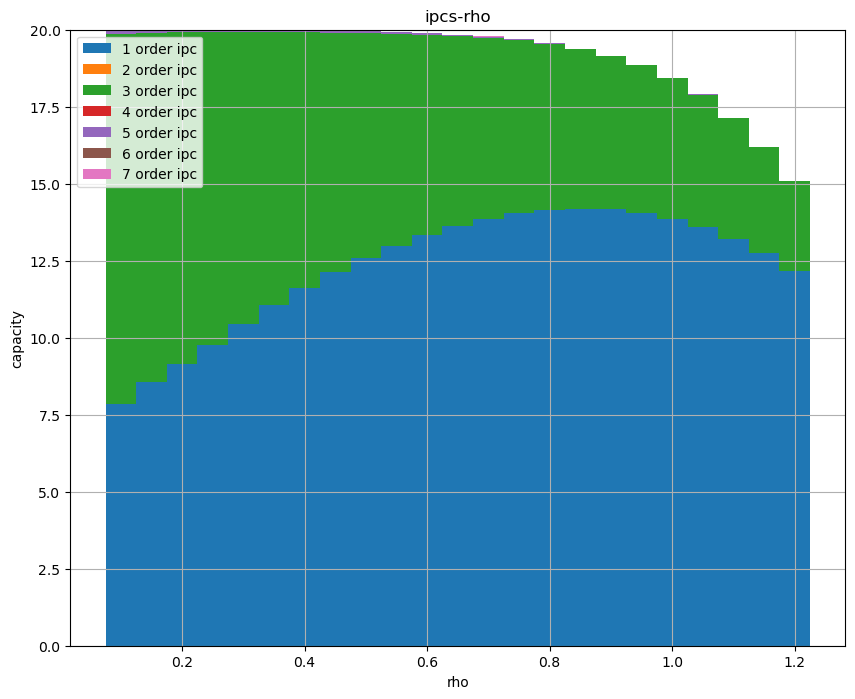

In [8]:
plt.figure(figsize=(10,8))
bottom=np.zeros(23)

for i in range(7):
    plt.bar(rhos.cpu().numpy(),ipcs[:,i].cpu().numpy(),bottom=bottom,width=0.05,label=f"{i+1} order ipc")
    bottom+=ipcs[:,i].cpu().numpy()
    
plt.grid(True)
plt.ylim(0,20)
plt.title("ipcs-rho")
plt.xlabel("rho")
plt.ylabel("capacity")
plt.legend()

plt.savefig("./graphs/ipcs_rho.eps")
plt.savefig("./graphs/ipcs_rho.png")
